In [ ]:
import pyreadstat
import numpy as np
import pandas as pd
import matplotlib as plt 
import seaborn as sns

In [9]:
# hip_fracture_df, hip_fracture_metadata = pyreadstat.read_sav('../../Analysis/Data/HipFractureQualityData.sav')
hip_fracture_df, hip_fracture_metadata = pyreadstat.read_sav(
    '/Users/zhixiangyao/Desktop/Spring\ 2023/Intro\ BioMed\ Data\ Sci/Project/BME580_FinalProject/Data/HipFractureQualityData.sav'
    )
print(dir(hip_fracture_metadata))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'column_labels', 'column_names', 'column_names_to_labels', 'file_encoding', 'file_format', 'file_label', 'missing_ranges', 'missing_user_values', 'notes', 'number_columns', 'number_rows', 'original_variable_types', 'readstat_variable_types', 'table_name', 'value_labels', 'variable_alignment', 'variable_display_width', 'variable_measure', 'variable_storage_width', 'variable_to_label', 'variable_value_labels']


In [10]:
column_labels = hip_fracture_metadata.column_labels 
column_mapping = {column: column_labels[i] for i, column in enumerate(hip_fracture_df.columns)}
print(column_mapping)

{'CASEID': 'CASEID', 'HIP_PREOP_DEMENTIA': 'Pre-operative dementia', 'HIP_PREOP_DELIRIUM': 'Pre-operative delirium', 'HIP_PREOP_BONEMEDS': 'Pre-fracture bone protection medication prescription', 'HIP_PREOP_MOBAID': 'Use of Mobility Aid', 'HIP_PREOP_PRESSORE': 'Pre-operative pressure sore', 'HIP_MED_COMGMT': 'Medical co-management', 'HIP_STDCARE': 'Standardized hip fracture care program', 'HIP_WBAT_POD1': 'Weight bearing as tolerated (WBAT) on POD #1', 'HIP_DVT_28D': 'Medical DVT prophylaxis continued 28 days post-op', 'HIP_FRACTYPE': 'Type/location of fracture', 'HIP_PATHFRAC': 'Pathological fracture', 'HIP_POST_PRESSORE': 'New post-operative pressure sore', 'HIP_POST_DELIRIUM': 'Post-operative delirium', 'HIP_POST_MOBAID': 'Postoperative use of mobility aid', 'HIP_POST_BONEMEDS': 'Prescription of post-op bone protection medication', 'HIP_RES30D': 'Place of residence at 30 days post-op', 'SEX': 'Gender', 'RACE_NEW': 'New Race', 'ETHNICITY_HISPANIC': 'Ethnicity Hispanic', 'PRNCPTX': 'Pr

In [12]:
hip_fracture_df = pd.DataFrame(hip_fracture_df)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
hip_fracture_df.info()
hip_fracture_df.head()
hip_fracture_df['RACE_NEW'].value_counts()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36485 entries, 0 to 36484
Columns: 383 entries, CASEID to albuminmissing
dtypes: float64(254), object(129)
memory usage: 106.6+ MB


White                                        34059
Black or African American                     1311
Asian                                          873
American Indian or Alaska Native               201
Native Hawaiian or Pacific Islander             31
Native Hawaiian or Other Pacific Islander        5
Some Other Race                                  5
Name: RACE_NEW, dtype: int64

In [13]:
hip_fracture_df['RACE_NEW'].value_counts()

White                                        34059
Black or African American                     1311
Asian                                          873
American Indian or Alaska Native               201
Native Hawaiian or Pacific Islander             31
Native Hawaiian or Other Pacific Islander        5
Some Other Race                                  5
Name: RACE_NEW, dtype: int64

In [57]:
hip_fracture_df.describe()

CASEID       WORKRVU           AGE         ADMYR        OPERYR  \
count  3.648500e+04  36485.000000  36485.000000  36485.000000  36485.000000   
mean   8.559286e+06     17.966264     82.131177   2018.124188   2018.127313   
std    1.791276e+06      0.275950      7.397715      1.384166      1.382495   
min    4.881912e+06     17.610000     65.000000   2015.000000   2016.000000   
25%    7.110993e+06     17.610000     77.000000   2017.000000   2017.000000   
50%    8.846907e+06     18.180000     84.000000   2018.000000   2018.000000   
75%    1.008303e+07     18.180000     89.000000   2019.000000   2019.000000   
max    1.142598e+07     18.180000     90.000000   2020.000000   2020.000000   

             HEIGHT        WEIGHT         DPRNA        DPRBUN      DPRCREAT  \
count  36485.000000  36485.000000  36485.000000  36485.000000  36485.000000   
mean      57.953597    142.975880      0.053145     -0.303851      0.043059   
std       31.641859     51.111463      7.462518      9.561258      7.526202   
min      -99.000000    -99.000000    -99.000000    -99.000000    -99.000000   
25%       61.000000    119.000000      0.000000      0.000000      0.000000   
50%       64.000000    142.000000      0.000000      0.000000      0.000000   
75%       67.000000    169.000000      1.000000      1.000000      1.000000   
max       81.000000    552.000000     90.000000     90.000000     90.000000   

           DPRALBUM       DPRBILI       DPRSGOT      DPRALKPH        DPRWBC  \
count  36485.000000  36485.000000  36485.000000  36485.000000  36485.000000   
mean     -24.312896    -28.392874    -28.473866    -28.225572      0.143292   
std       48.171090     50.481278     50.612127     50.407283      6.912767   
min      -99.000000    -99.000000    -99.000000    -99.000000    -99.000000   
25%      -99.000000    -99.000000    -99.000000    -99.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max       90.000000     90.000000     90.000000     90.000000     90.000000   

             DPRHCT      DPRPLATE        DPRPTT         DPRPT        DPRINR  \
count  36485.000000  36485.000000  36485.000000  36485.000000  36485.000000   
mean      -0.006222     -0.145731    -42.855859    -98.879074    -11.317966   
std        7.625933      8.767449     50.731940      3.484528     33.476376   
min      -99.000000    -99.000000    -99.000000    -99.000000    -99.000000   
25%        0.000000      0.000000    -99.000000    -99.000000      0.000000   
50%        0.000000      0.000000      0.000000    -99.000000      1.000000   
75%        1.000000      1.000000      1.000000    -99.000000      1.000000   
max       90.000000     90.000000     90.000000     34.000000     89.000000   

             PRSODM         PRBUN       PRCREAT       PRALBUM        PRBILI  \
count  36485.000000  36485.000000  36485.000000  36485.000000  36485.000000   
mean     136.997720     21.452199      0.599559    -25.225776    -31.641404   
std       16.441977     16.061946      6.880847     46.066072     46.663960   
min      -99.000000    -99.000000    -99.000000    -99.000000    -99.000000   
25%      136.000000     15.000000      0.700000    -99.000000    -99.000000   
50%      138.000000     20.000000      0.890000      3.300000      0.400000   
75%      141.000000     26.000000      1.160000      3.800000      0.700000   
max      164.000000    187.000000     14.500000      8.500000     13.000000   

             PRSGOT       PRALKPH         PRWBC         PRHCT       PRPLATE  \
count  36485.000000  36485.000000  36485.000000  36485.000000  36485.000000   
mean     -13.362124     28.218787      9.383725     34.091295    205.287325   
std       63.985551     97.344212      8.465093     10.855030     80.842718   
min      -99.000000    -99.000000    -99.000000    -99.000000    -99.000000   
25%      -99.000000    -99.000000      7.450000     31.000

In [59]:
hip_fracture_df.min()

CASEID                                                                                                                                 4881912.0
HIP_PREOP_DEMENTIA                                                                                                                            No
HIP_PREOP_DELIRIUM                                                                                                                          NULL
HIP_PREOP_BONEMEDS                                                                                                                            No
HIP_PREOP_MOBAID                                                                                                                              No
HIP_PREOP_PRESSORE                                                                                                                            No
HIP_MED_COMGMT                                                                                                                    

In [60]:
hip_fracture_df.max()

CASEID                                                                                                  11425985.0
HIP_PREOP_DEMENTIA                                                                                             Yes
HIP_PREOP_DELIRIUM                                                                                             Yes
HIP_PREOP_BONEMEDS                                                                                             Yes
HIP_PREOP_MOBAID                                                                                               Yes
HIP_PREOP_PRESSORE                                                                                             Yes
HIP_MED_COMGMT                                                               Yes-partial co-management during stay
HIP_STDCARE                                                                                                    Yes
HIP_WBAT_POD1                                                                   

In [61]:
hip_fracture_df.mean()

C:\Users\Asus\AppData\Local\Temp\ipykernel_17512\3208647766.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  hip_fracture_df.mean()


CASEID                       8.559286e+06
WORKRVU                      1.796626e+01
AGE                          8.213118e+01
ADMYR                        2.018124e+03
OPERYR                       2.018127e+03
HEIGHT                       5.795360e+01
WEIGHT                       1.429759e+02
DPRNA                        5.314513e-02
DPRBUN                      -3.038509e-01
DPRCREAT                     4.305879e-02
DPRALBUM                    -2.431290e+01
DPRBILI                     -2.839287e+01
DPRSGOT                     -2.847387e+01
DPRALKPH                    -2.822557e+01
DPRWBC                       1.432918e-01
DPRHCT                      -6.221735e-03
DPRPLATE                    -1.457311e-01
DPRPTT                      -4.285586e+01
DPRPT                       -9.887907e+01
DPRINR                      -1.131797e+01
PRSODM                       1.369977e+02
PRBUN                        2.145220e+01
PRCREAT                      5.995594e-01
PRALBUM                     -2.522

In [62]:
hip_fracture_df.median()

C:\Users\Asus\AppData\Local\Temp\ipykernel_17512\366793326.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  hip_fracture_df.median()


CASEID                       8.846907e+06
CPT                          2.724500e+04
WORKRVU                      1.818000e+01
AGE                          8.400000e+01
ADMYR                        2.018000e+03
OPERYR                       2.018000e+03
HEIGHT                       6.400000e+01
WEIGHT                       1.420000e+02
DPRNA                        0.000000e+00
DPRBUN                       0.000000e+00
DPRCREAT                     0.000000e+00
DPRALBUM                     0.000000e+00
DPRBILI                      0.000000e+00
DPRSGOT                      0.000000e+00
DPRALKPH                     0.000000e+00
DPRWBC                       0.000000e+00
DPRHCT                       0.000000e+00
DPRPLATE                     0.000000e+00
DPRPTT                       0.000000e+00
DPRPT                       -9.900000e+01
DPRINR                       1.000000e+00
PRSODM                       1.380000e+02
PRBUN                        2.000000e+01
PRCREAT                      8.900

In [58]:
hip_fracture_df.std()

C:\Users\Asus\AppData\Local\Temp\ipykernel_17512\3245295097.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  hip_fracture_df.std()


CASEID                       1.791276e+06
WORKRVU                      2.759503e-01
AGE                          7.397715e+00
ADMYR                        1.384166e+00
OPERYR                       1.382495e+00
HEIGHT                       3.164186e+01
WEIGHT                       5.111146e+01
DPRNA                        7.462518e+00
DPRBUN                       9.561258e+00
DPRCREAT                     7.526202e+00
DPRALBUM                     4.817109e+01
DPRBILI                      5.048128e+01
DPRSGOT                      5.061213e+01
DPRALKPH                     5.040728e+01
DPRWBC                       6.912767e+00
DPRHCT                       7.625933e+00
DPRPLATE                     8.767449e+00
DPRPTT                       5.073194e+01
DPRPT                        3.484528e+00
DPRINR                       3.347638e+01
PRSODM                       1.644198e+01
PRBUN                        1.606195e+01
PRCREAT                      6.880847e+00
PRALBUM                      4.606

In [63]:
hip_fracture_df.corr()

C:\Users\Asus\AppData\Local\Temp\ipykernel_17512\854947936.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hip_fracture_df.corr()


CASEID   WORKRVU       AGE     ADMYR    OPERYR  \
CASEID                     1.000000 -0.022777 -0.032654  0.976632  0.976711   
WORKRVU                   -0.022777  1.000000  0.002224 -0.022169 -0.022738   
AGE                       -0.032654  0.002224  1.000000 -0.032320 -0.032290   
ADMYR                      0.976632 -0.022169 -0.032320  1.000000  0.999187   
OPERYR                     0.976711 -0.022738 -0.032290  0.999187  1.000000   
HEIGHT                     0.013096 -0.016860 -0.050342  0.018014  0.018011   
WEIGHT                     0.020748 -0.015662 -0.201616  0.024200  0.024207   
DPRNA                      0.005670 -0.006441  0.003216  0.007016  0.007112   
DPRBUN                    -0.023196 -0.006756  0.001187 -0.021861 -0.022149   
DPRCREAT                   0.001169 -0.006220  0.003597  0.001465  0.001567   
DPRALBUM                   0.090375 -0.029465 -0.019330  0.088308  0.088884   
DPRBILI                    0.094990 -0.023334 -0.026756  0.094667  0.095352   
DPRSGOT                    0.091743 -0.020579 -0.027816  0.091375  0.092059   
DPRALKPH                   0.096644 -0.023729 -0.028378  0.096607  0.097327   
DPRWBC                     0.009082 -0.000554  0.006045  0.008962  0.009064   
DPRHCT                    -0.011282 -0.004054  0.002217 -0.009101 -0.008918   
DPRPLATE                  -0.008430 -0.001981 -0.000904 -0.006488 -0.006352   
DPRPTT                     0.015773  0.023521  0.017711  0.017016  0.017639   
DPRPT                     -0.068352 -0.007143 -0.001570 -0.054390 -0.053402   
DPRINR                    -0.012484  0.021463  0.021525 -0.013964 -0.013685   
PRSODM                    -0.001608  0.000031  0.029245 -0.000255 -0.000112   
PRBUN                     -0.005482  0.017147  0.111259 -0.003552 -0.003406   
PRCREAT                    0.002029  0.002116  0.017193  0.003087  0.003277   
PRALBUM                    0.100693 -0.031649 -0.019215  0.099019  0.099662   
PRBILI                     0.106917 -0.024506 -0.028102  0.107294  0.108017   
PRSGOT                     0.093101 -0.026927 -0.040072  0.093003  0.093712   
PRALKPH                    0.102145 -0.027219 -0.059000  0.103101  0.103997   
PRWBC                      0.008949  0.008954  0.032622  0.008749  0.009188   
PRHCT                      0.011212 -0.101596 -0.031531  0.014812  0.014794   
PRPLATE                    0.027640 -0.011161 -0.065979  0.028513  0.028802   
PRPTT                      0.016107  0.021084  0.021156  0.017441  0.018005   
PRINR                     -0.013014  0.024481  0.024437 -0.014556 -0.014317   
PRPT                      -0.068423 -0.007445 -0.001037 -0.054445 -0.053458   
OTHERWRVU1                -0.036106 -0.003199 -0.018539 -0.036907 -0.036803   
OTHERWRVU2                 0.002521 -0.012645 -0.006308  0.001611  0.001815   
OTHERWRVU3                 0.002966 -0.002707 -0.007139  0.003432  0.003373   
OTHERWRVU4                 0.000964 -0.005771 -0.010885  0.000920  0.000886   
OTHERWRVU5                 0.002388 -0.006759 -0.006462  0.003313  0.003305   
CONWRVU1                  -0.005666 -0.002872  0.010048 -0.004939 -0.005038   
CONWRVU2                   0.005182 -0.005695  0.007991  0.004406  0.004380   
CONWRVU3                  -0.004285 -0.006759 -0.002216 -0.004252 -0.004269   
CONWRVU4                        NaN       NaN       NaN       NaN       NaN   
CONWRVU5                        NaN       NaN       NaN       NaN       NaN   
MORTPROB                   0.002807  0.026424  0.264792  0.008397  0.009174   
MORBPROB                   0.045855  0.027532  0.092883  0.057997  0.058774   
OPTIME                     0.024092 -0.237247 -0.070037  0.025484  0.025624   
HDISDT                     0.976829 -0.022083 -0.032560  0.996217  0.997008   
YRDEATH                   -0.003069  0.003165  0.092891 -0.000904 -0.000765   
TOTHLOS                    0.013432  0.007453 -0.024974  0.013612  0.014874   
ADMQTR                     0.148932 -0.003786  0.004819 -0.034059 -0.031108   


C:\Users\Asus\AppData\Local\Temp\ipykernel_17512\1627279222.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hip_fracture_df.corr())


<Axes: >

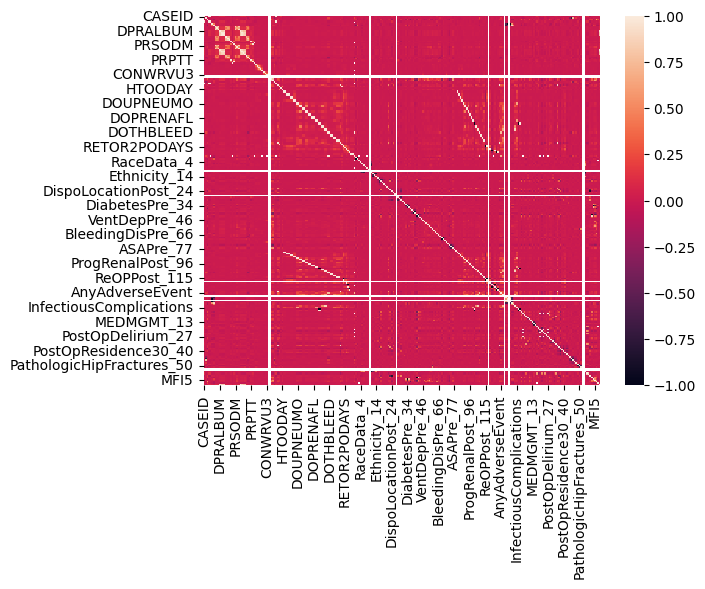

In [67]:
sns.heatmap(hip_fracture_df.corr())

In [50]:
hip_fracture_df.dtypes

CASEID                       float64
HIP_PREOP_DEMENTIA            object
HIP_PREOP_DELIRIUM            object
HIP_PREOP_BONEMEDS            object
HIP_PREOP_MOBAID              object
HIP_PREOP_PRESSORE            object
HIP_MED_COMGMT                object
HIP_STDCARE                   object
HIP_WBAT_POD1                 object
HIP_DVT_28D                   object
HIP_FRACTYPE                  object
HIP_PATHFRAC                  object
HIP_POST_PRESSORE             object
HIP_POST_DELIRIUM             object
HIP_POST_MOBAID               object
HIP_POST_BONEMEDS             object
HIP_RES30D                    object
SEX                           object
RACE_NEW                      object
ETHNICITY_HISPANIC            object
PRNCPTX                       object
CPT                           object
WORKRVU                      float64
INOUT                         object
TRANST                        object
AGE                          float64
ADMYR                        float64
O

In [52]:
hip_fracture_df.count()

CASEID                       36485
HIP_PREOP_DEMENTIA           36485
HIP_PREOP_DELIRIUM           36485
HIP_PREOP_BONEMEDS           36485
HIP_PREOP_MOBAID             36485
HIP_PREOP_PRESSORE           36485
HIP_MED_COMGMT               36485
HIP_STDCARE                  36485
HIP_WBAT_POD1                36485
HIP_DVT_28D                  36485
HIP_FRACTYPE                 36485
HIP_PATHFRAC                 36485
HIP_POST_PRESSORE            36485
HIP_POST_DELIRIUM            36485
HIP_POST_MOBAID              36485
HIP_POST_BONEMEDS            36485
HIP_RES30D                   36485
SEX                          36485
RACE_NEW                     36485
ETHNICITY_HISPANIC           36485
PRNCPTX                      36485
CPT                          36485
WORKRVU                      36485
INOUT                        36485
TRANST                       36485
AGE                          36485
ADMYR                        36485
OPERYR                       36485
DISCHDEST           

In [55]:
hip_fracture_df["SEX"].value_counts()

female    25675
male      10809
non-bi        1
Name: SEX, dtype: int64

In [56]:
hip_fracture_df.isnull().sum()

CASEID                           0
HIP_PREOP_DEMENTIA               0
HIP_PREOP_DELIRIUM               0
HIP_PREOP_BONEMEDS               0
HIP_PREOP_MOBAID                 0
HIP_PREOP_PRESSORE               0
HIP_MED_COMGMT                   0
HIP_STDCARE                      0
HIP_WBAT_POD1                    0
HIP_DVT_28D                      0
HIP_FRACTYPE                     0
HIP_PATHFRAC                     0
HIP_POST_PRESSORE                0
HIP_POST_DELIRIUM                0
HIP_POST_MOBAID                  0
HIP_POST_BONEMEDS                0
HIP_RES30D                       0
SEX                              0
RACE_NEW                         0
ETHNICITY_HISPANIC               0
PRNCPTX                          0
CPT                              0
WORKRVU                          0
INOUT                            0
TRANST                           0
AGE                              0
ADMYR                            0
OPERYR                           0
DISCHDEST           

Text(0.5, 0, 'Age Distribution')

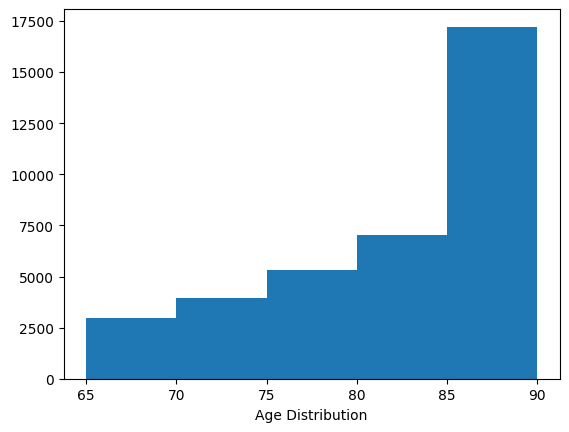

In [31]:
plt.hist(hip_fracture_df["AGE"],bins=5)
plt.xlabel("Age Distribution")

(array([2.5675e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0809e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

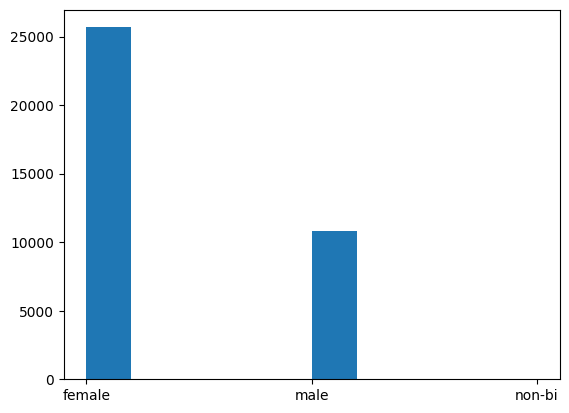

In [95]:
plt.hist(hip_fracture_df["SEX"])

In [73]:
grp_Age = hip_fracture_df.groupby("AGE")

ReadmissionPost_119
0.0    Axes(0.125,0.11;0.775x0.77)
1.0    Axes(0.125,0.11;0.775x0.77)
Name: AGE, dtype: object

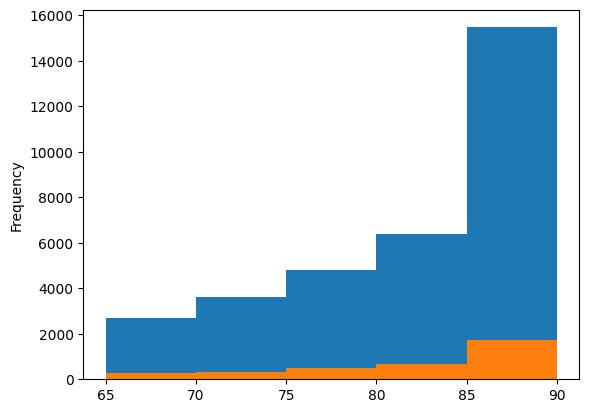

In [91]:
hip_fracture_df.groupby("ReadmissionPost_119")["AGE"].plot.hist(bins=5)


<Axes: ylabel='Frequency'>

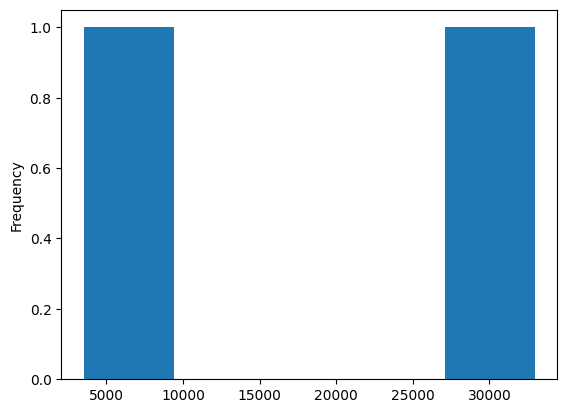

In [107]:
hip_fracture_df.groupby("ReadmissionPost_119")["RACE_NEW"].count().plot.hist(bins=5)

In [ ]:
hip_fracture_df["R"]